### Matplotlib

![](data/static/2024-06-30_21-42.png)

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [17]:
housing_raw = pd.read_csv("data/housing_data.csv", parse_dates=["period_begin", "period_end"])

# preparing dataset for visualization
ca_housing = (
    housing_raw
    .loc[housing_raw["region_name"].str.contains("CA")]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego']")
)
ca_housing_markets = (
    ca_housing
    .set_index("period_begin")
    .loc[:, ["region_name", "median_active_list_price"]]
    .sort_index()
    .pivot_table(
        index="period_begin",
        columns="region_name",
        values="median_active_list_price"
    )
   .resample("Q")
   .mean()
)

/tmp/ipykernel_20649/3284014046.py:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  .resample("Q")


In [18]:
ca_housing.head(3)


,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
889,Los Angeles,2018-08-20,2018-11-11,16015.0,20026.0,21675.0,51.9,694662.5,16.528985
3773,Los Angeles,2017-12-25,2018-03-18,13596.0,13817.0,15251.0,51.3,664516.6,13.834214
5859,Los Angeles,2019-01-21,2019-04-14,13372.0,18580.0,20097.0,58.2,697324.3,18.764906


In [19]:
ca_housing_markets.head(3)

region_name,Los Angeles,San Diego,San Francisco
period_begin,,,
2017-03-31,630556.884615,637701.207692,1.263499e+06
2017-06-30,650076.576923,652194.530769,1.259083e+06
2017-09-30,651898.046154,646278.800000,1.276378e+06


#### Chart title and fonts

Text(0, 0.5, 'Price(Millions)')

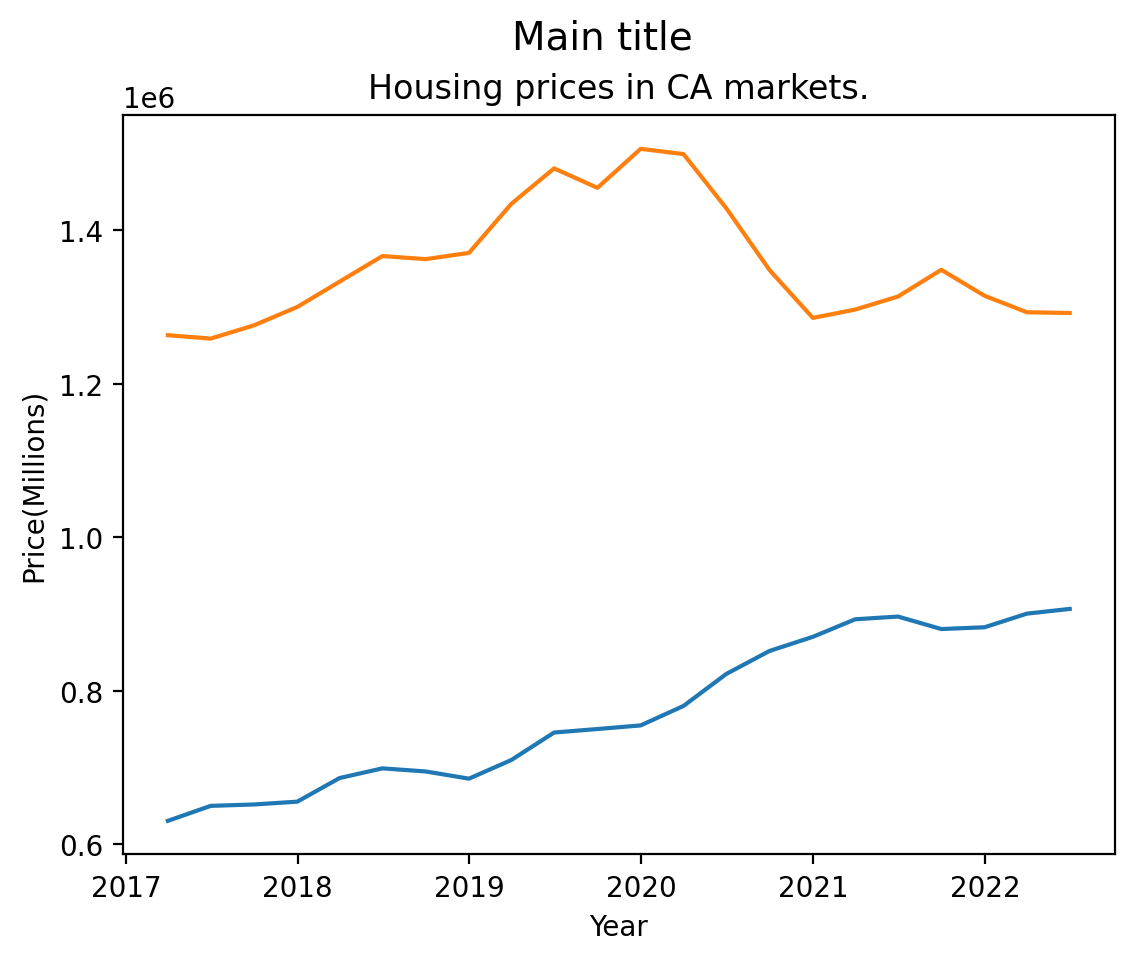

In [20]:
fig, axes = plt.subplots()
axes.plot(ca_housing_markets.index, ca_housing_markets["Los Angeles"])
axes.plot(ca_housing_markets.index, ca_housing_markets["San Francisco"])

fig.suptitle("Main title", fontsize=14) # main title 

axes.set_title("Housing prices in CA markets.", fontsize=12) # title for axis 

axes.set_xlabel("Year") # title for x label

axes.set_ylabel("Price(Millions)") # title for y label 


#### Legend

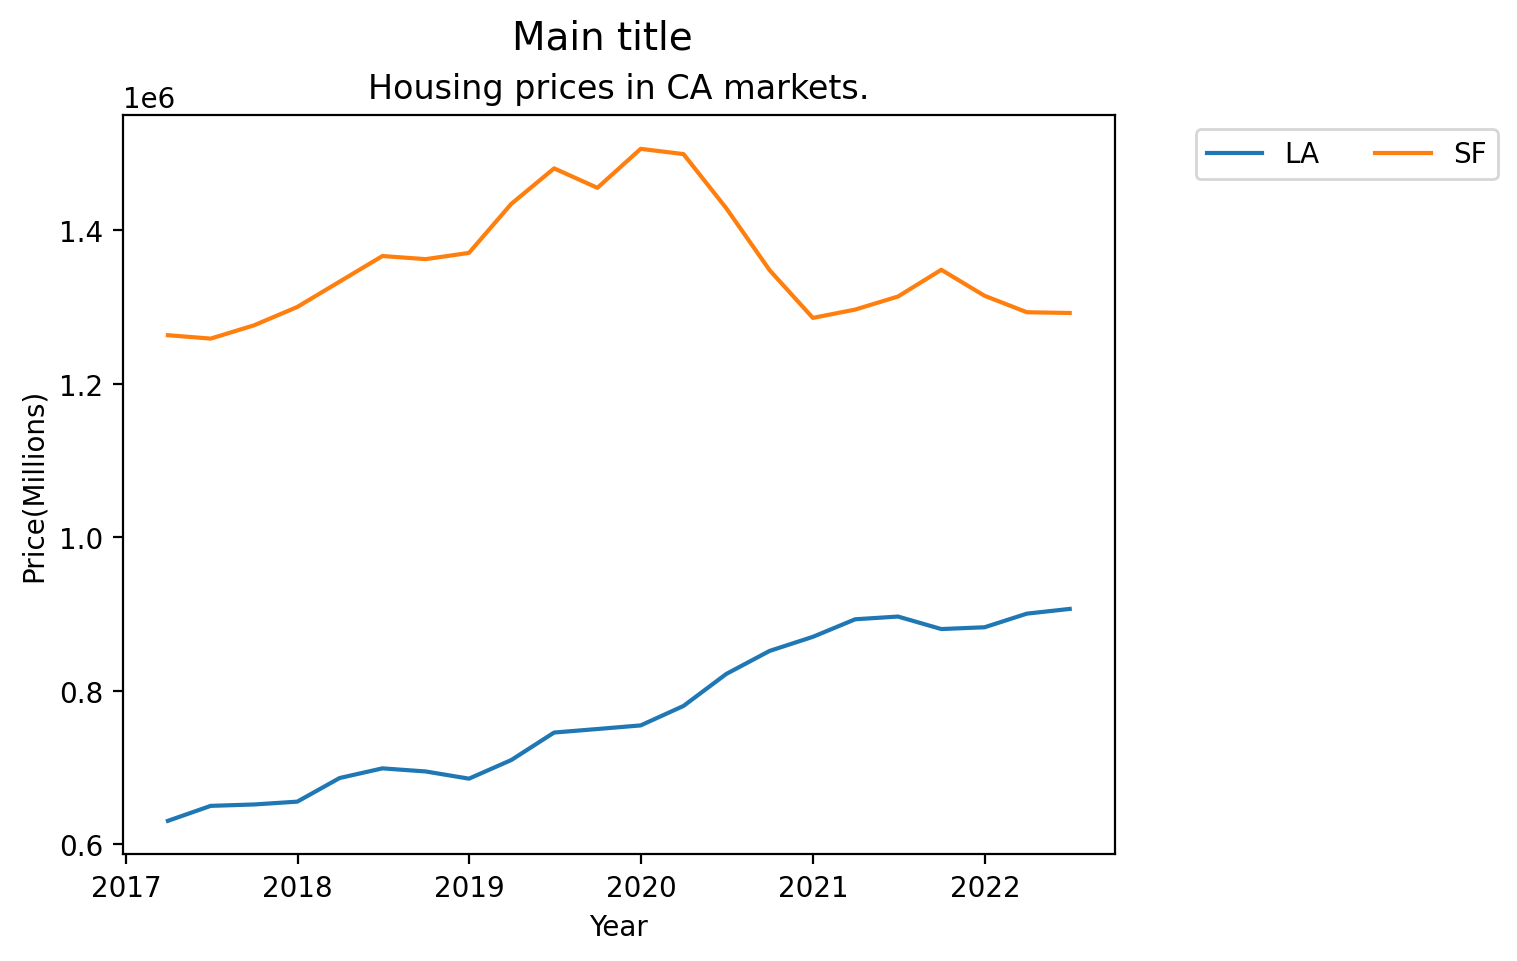

In [21]:
fig, ax = plt.subplots()
ax.plot(
            ca_housing_markets.index, 
            ca_housing_markets["Los Angeles"],
            label= "Los Angeles"                    # Here we added label so now when we add lable 
                                                    # we can invoke lengend by ax.legend()
        )

ax.plot(
            ca_housing_markets.index, 
            ca_housing_markets["San Francisco"],
            label= "San Francisco"
        )

fig.suptitle("Main title", fontsize=14) # main title 

ax.set_title("Housing prices in CA markets.", fontsize=12) # title for axis 

ax.set_xlabel("Year") # title for x label

ax.set_ylabel("Price(Millions)") # title for y label 

# ax.legend()  

# or we ca pass custom value to legend 
# ax.legend(["LA", "SF"])


# How to determine the location of the legend ?
# ax.legend(["LA", "SF"], loc = "lower right") # best, lower right, upper center, upper left, upper right, upper center ... 


# What if we want our legend outsize of the axes ? then we use 
# bbox_to_anchor()
ax.legend(["LA", "SF"], bbox_to_anchor = [1.4,1], ncol = 2)

#### Linechart Line Style

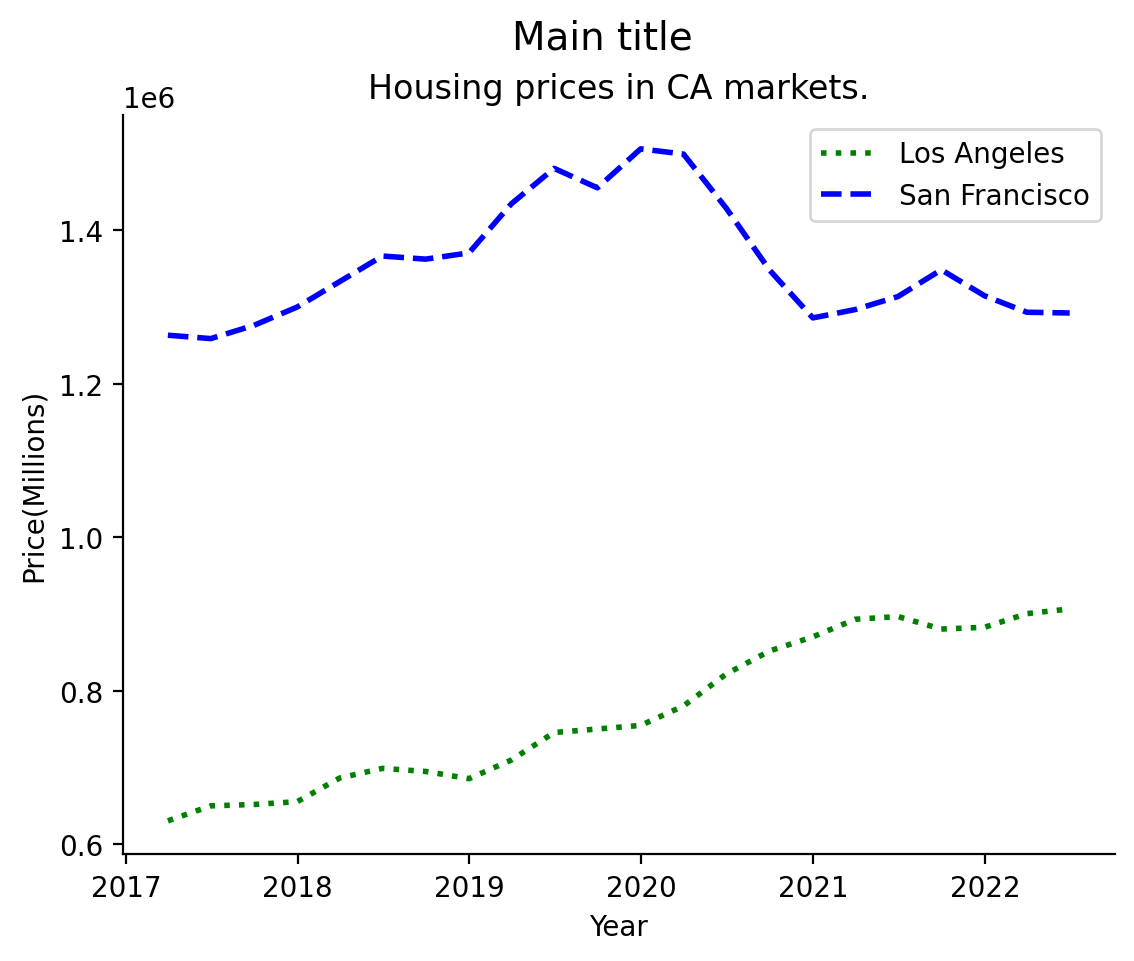

In [22]:
fig, ax = plt.subplots()
ax.plot(
            ca_housing_markets.index, 
            ca_housing_markets["Los Angeles"],
            color = "green", 
            linewidth = 2, 
            label= "Los Angeles", 
            ls = ":"

        )

ax.plot(
            ca_housing_markets.index, 
            ca_housing_markets["San Francisco"],
            label= "San Francisco",
            color = "blue", 
            linewidth = 2, 
            ls = "--"
        )

fig.suptitle("Main title", fontsize=14) # main title 

ax.set_title("Housing prices in CA markets.", fontsize=12) # title for axis 

ax.set_xlabel("Year") # title for x label

ax.set_ylabel("Price(Millions)") # title for y label 

ax.legend()


##### Bonus remove borders 
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

### Custom X-ticks

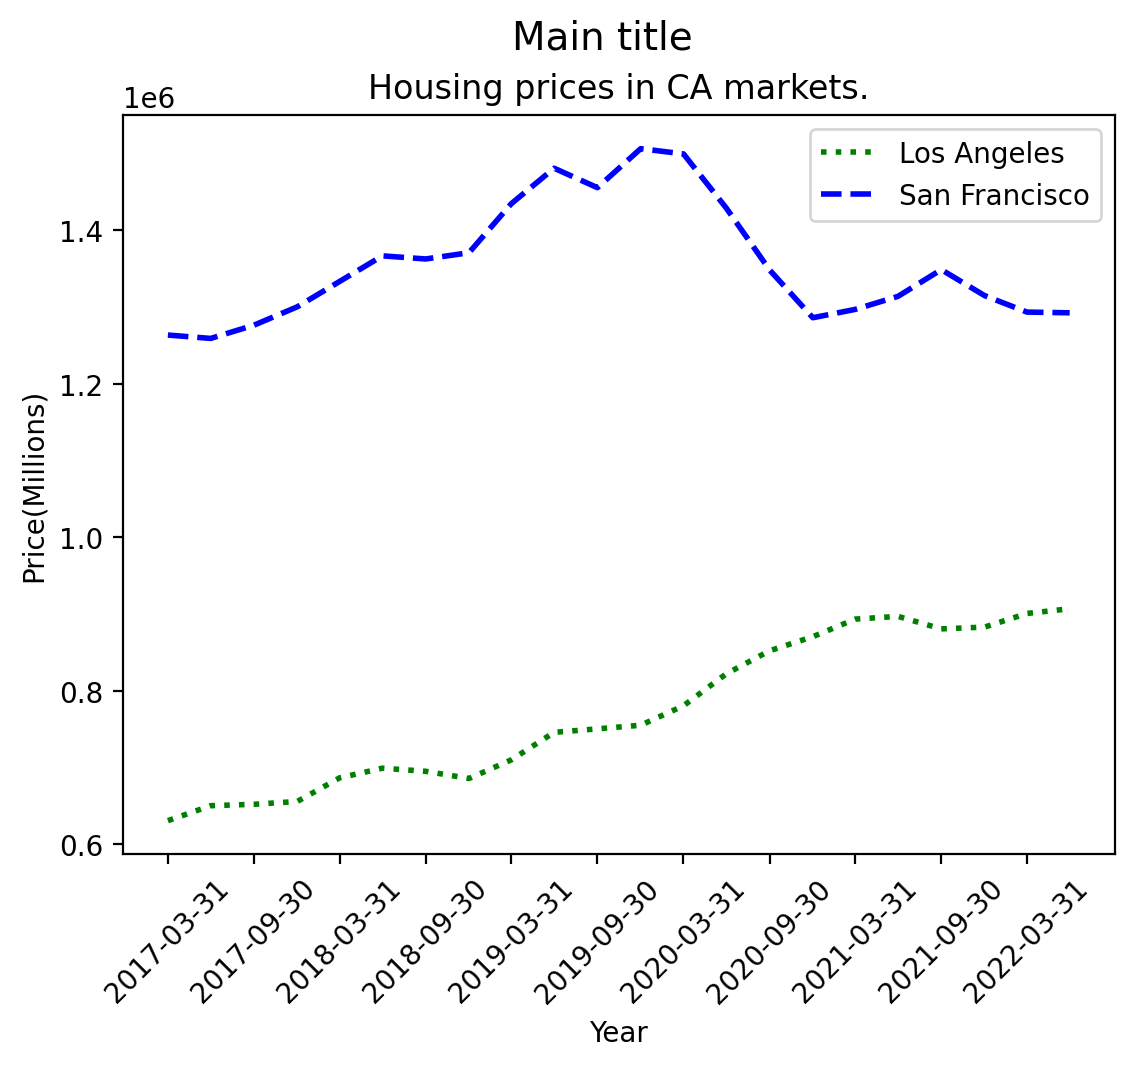

In [23]:
fig, ax = plt.subplots()
ax.plot(
            ca_housing_markets.index, 
            ca_housing_markets["Los Angeles"],
            color = "green", 
            linewidth = 2, 
            label= "Los Angeles", 
            ls = ":"

        )

ax.plot(
            ca_housing_markets.index, 
            ca_housing_markets["San Francisco"],
            label= "San Francisco",
            color = "blue", 
            linewidth = 2, 
            ls = "--"
        )

fig.suptitle("Main title", fontsize=14) # main title 

ax.set_title("Housing prices in CA markets.", fontsize=12) # title for axis 

ax.set_xlabel("Year") # title for x label

ax.set_ylabel("Price(Millions)") # title for y label 

ax.set_xticks(ca_housing_markets.index[::2])

plt.xticks(rotation = 45)

ax.legend()

#### Stacked Line Chart

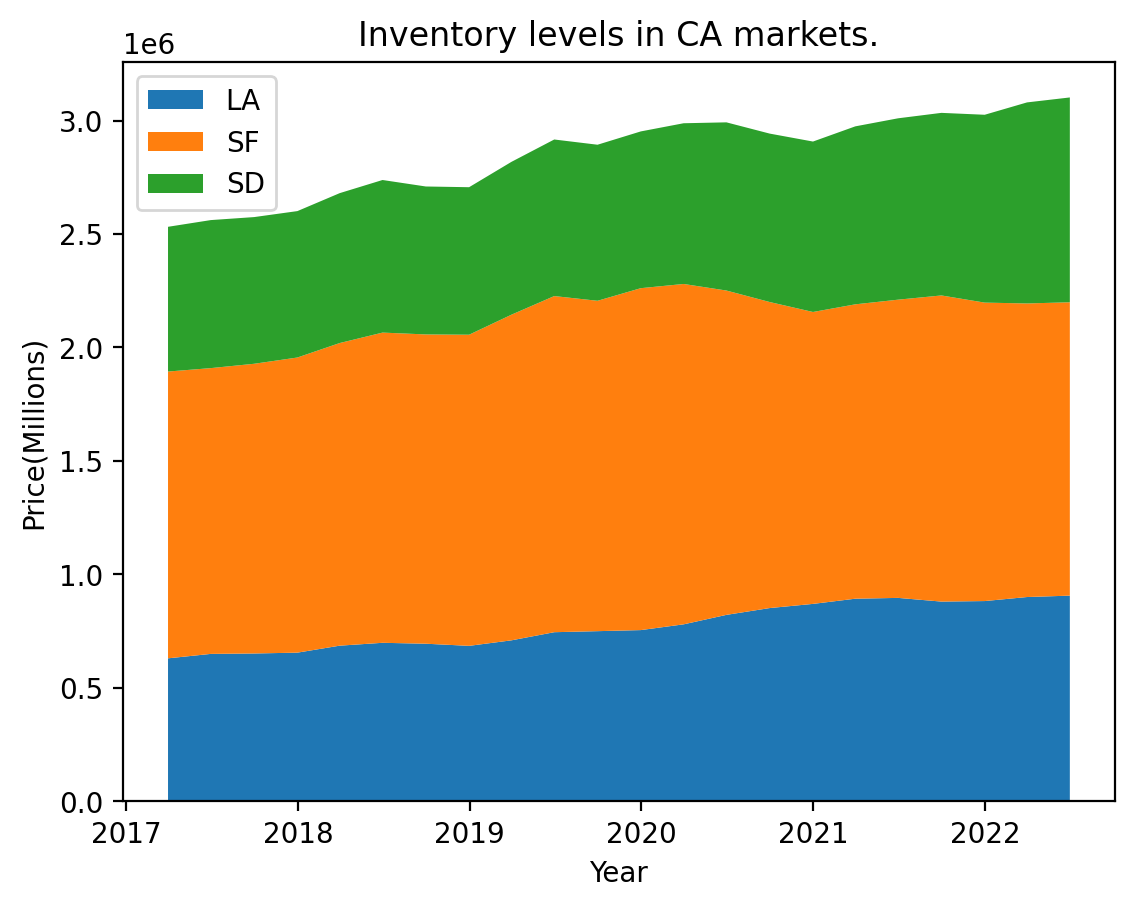

In [24]:
fig, ax = plt.subplots()
ax.stackplot(
            ca_housing_markets.index, 
            ca_housing_markets["Los Angeles"],
            ca_housing_markets["San Francisco"],
            ca_housing_markets["San Diego"]


        )
ax.set_title("Inventory levels in CA markets.", fontsize=12) # title for axis 

ax.set_xlabel("Year") # title for x label

ax.set_ylabel("Price(Millions)") # title for y label 

ax.legend(["LA", "SF", "SD"])

#### Bar Chart

In [38]:
total_sold = (housing_raw
 .groupby("region_name")
 .agg({"total_homes_sold":"sum"})
 .sort_values("total_homes_sold", ascending=False).iloc[:10])

total_sold

,total_homes_sold
region_name,
"Maricopa County, AZ",5565588.0
"Los Angeles County, CA",4622703.0
"Cook County, IL",4440093.0
"Harris County, TX",3530037.0
"Clark County, NV",2674337.0
"Broward County, FL",2413966.0
"San Diego County, CA",2373289.0
"Riverside County, CA",2335243.0
"King County, WA",2281078.0


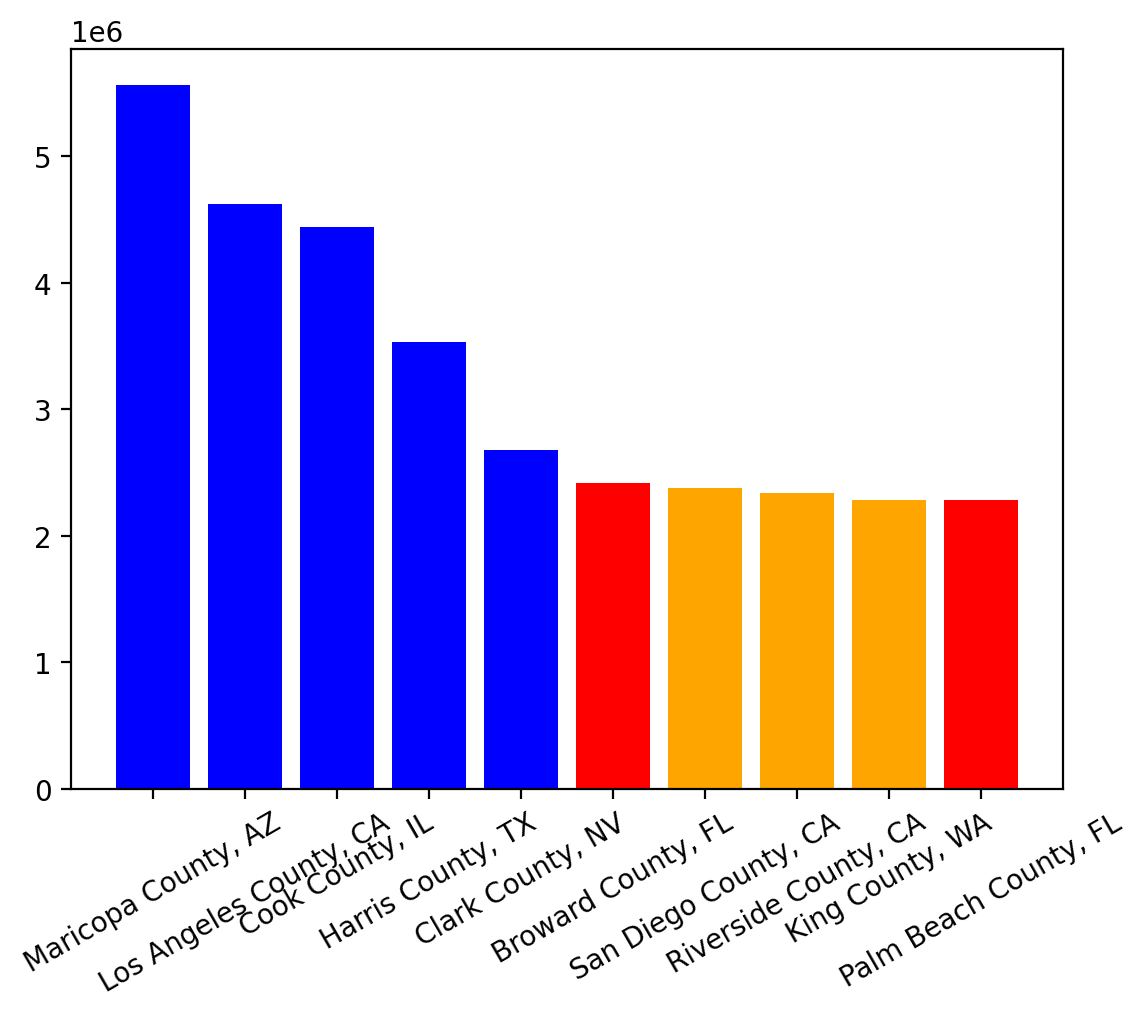

In [39]:
fig, ax = plt.subplots()

colors = [
    "blue", 
    "blue",
    "blue",
    "blue",
    "blue",
    "red",
    "orange",
    "orange",
    "orange",
    "red"
]

ax.bar(x=total_sold.index, 
       height=total_sold["total_homes_sold"],
       color=colors
)

ax.xaxis.set_tick_params(rotation=30)

In [26]:
ca_housing_markets.index[::3]

DatetimeIndex(['2017-03-31', '2017-12-31', '2018-09-30', '2019-06-30',
               '2020-03-31', '2020-12-31', '2021-09-30', '2022-06-30'],
              dtype='datetime64[ns]', name='period_begin', freq='3QE-DEC')

In [27]:
df = pd.read_csv("data/guns.csv")
df = df.loc[:, ~df.columns.str.startswith("Unnamed")]
df.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


### BarGraph

Show the distribution of incidents by intent (e.g., Suicide, Homicide, etc.)

In [28]:
data = df["intent"].value_counts().reset_index()
data.columns = ["intent", "count"]

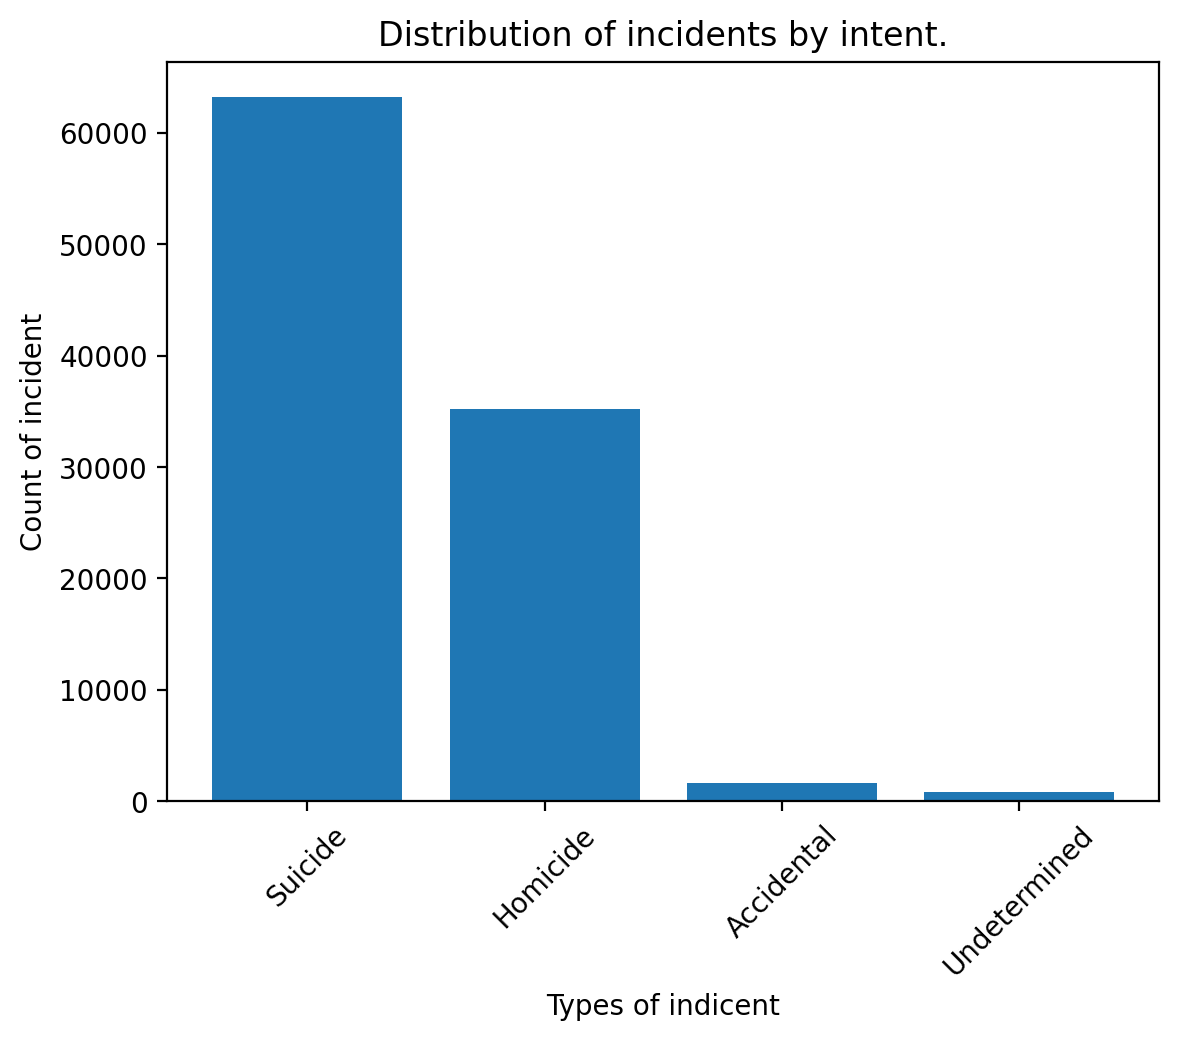

In [29]:
plt.bar(x= data["intent"], height=data["count"])
plt.title("Distribution of incidents by intent.") # set the title
plt.xlabel(xlabel="Types of indicent") # set the x label
plt.ylabel(ylabel="Count of incident") # set the y label
plt.xticks(rotation=45) # rotate the ticks by 45 
plt.show()

<Axes: xlabel='intent'>

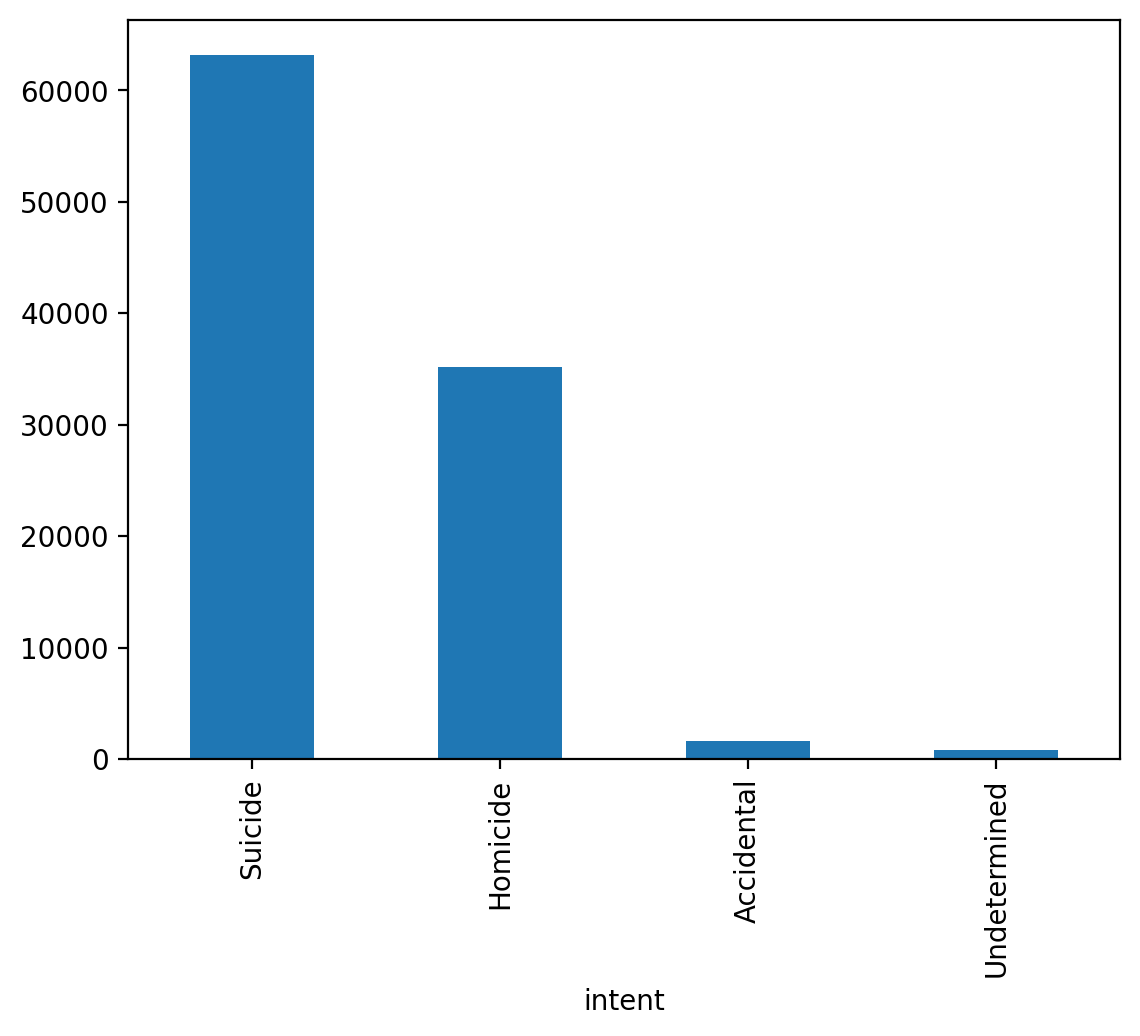

In [30]:
df["intent"].value_counts().plot(kind="bar")